In [103]:
from sklearn import *

In [104]:
import os,pickle
import numpy as np

In [105]:
os.getcwd()

'C:\\Users\\Dipanakr porey\\Videos\\kishan'

In [106]:
import pandas as pd
dataset = pd.read_csv("adult.csv")

In [107]:
dataset.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [108]:
categ = ['workclass','education','marital-status','occupation','relationship','race','sex','country']
dataset[categ]

,workclass,education,marital-status,occupation,relationship,race,sex,country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [109]:
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [110]:
# Encoding the variable
fit = dataset[categ].apply(lambda x: d[x.name].fit_transform(x))
fit.head(3)

,workclass,education,marital-status,occupation,relationship,race,sex,country
0,7,9,4,1,1,4,1,39
1,6,9,2,4,0,4,1,39
2,4,11,0,6,1,4,1,39


In [111]:
dataframe = pd.concat([fit,dataset["age"],dataset["fnlwgt"],dataset["education-num"],dataset["capital-gain"],dataset["capital-loss"],dataset["hours-per-week"]], axis=1)
dataframe.head(3)

,workclass,education,marital-status,occupation,relationship,race,sex,country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,7,9,4,1,1,4,1,39,39,77516,13,2174,0,40
1,6,9,2,4,0,4,1,39,50,83311,13,0,0,13
2,4,11,0,6,1,4,1,39,38,215646,9,0,0,40


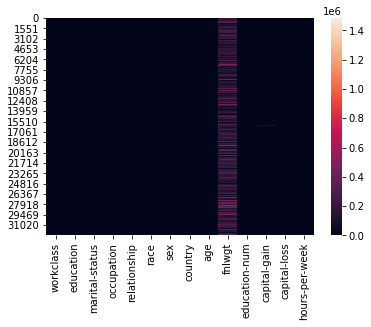

In [112]:
import seaborn as sns
ax = sns.heatmap(dataframe)

In [113]:
dataframe.columns.values

array(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'age', 'fnlwgt',
       'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype=object)

In [114]:
train = dataframe.values
train

array([[    7,     9,     4, ...,  2174,     0,    40],
       [    6,     9,     2, ...,     0,     0,    13],
       [    4,    11,     0, ...,     0,     0,    40],
       ...,
       [    4,    11,     6, ...,     0,     0,    40],
       [    4,    11,     4, ...,     0,     0,    20],
       [    5,    11,     2, ..., 15024,     0,    40]], dtype=int64)

In [115]:
print(set(dataset['salary']))
print(dataset['salary'][0])

{' >50K', ' <=50K'}
 <=50K


In [116]:
sal = preprocessing.LabelEncoder()
test = sal.fit_transform(dataset['salary'])
test

array([0, 0, 0, ..., 0, 0, 1])

In [117]:
print(train.shape, test.shape)

(32561, 14) (32561,)


In [118]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(train,test,test_size=0.02,random_state=50)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(31909, 14) (31909,)
(652, 14) (652,)


In [119]:
tr = tree.DecisionTreeClassifier(max_depth=7,random_state=0,criterion='entropy')
tr.fit(x_train,y_train)
pred = tr.predict(x_test)
metrics.accuracy_score(pred,y_test)

0.8573619631901841

In [120]:
tr = ensemble.RandomForestClassifier(max_depth=7,random_state=0,criterion='entropy')
tr.fit(x_train,y_train)
pred = tr.predict(x_test)
metrics.accuracy_score(pred,y_test)

0.8588957055214724

In [121]:
# x_test.shape

In [122]:
# k=x_test[0]
# print(k.shape)
# k=k.reshape(1,-1)
# print(k.shape)

In [123]:
classifier_model_name="classifier_model.pkl"
pickle.dump(tr,open(classifier_model_name,'wb'))

In [124]:
input_encoder = "data_model.pkl"
pickle.dump(d,open(input_encoder,'wb'))

In [125]:
result_encoder = "result_model.pkl"
pickle.dump(sal,open(result_encoder,'wb'))

In [126]:
# dataset.columns

In [127]:
# set(dataset["hours-per-week"])

In [128]:
# dataframe.columns

In [129]:
# set(dataframe['hours-per-week'])